# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [18]:
import numpy as np
from scipy import optimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We solve the model by scipy-optimization.

First, we define the relevant variables. 

Second, we define our utility function and budget constraint as functions. The utility function returns the utility from the given inputs - this is what we want to optimize. The budget-constraint returns the budget given the values herein. 

Third, we define a decision-function, returning the utility, given our knowledge, that consumption equals the budget.

Fourth, we define our optimization-function. Here, we optimize the decision-function for labor, given all the other values. 

In [19]:
#Defining variables:
m=1 #money
v=10 #v
e=0.3 #frisch
tau_0=0.4 #ltax
tau_1=0.1 #ttax
kappa=0.4 #cutoff
w=0.5

# Defining utility function and budget constraint:
def utility(l,c,e,v):
    # Returning utility from labour supply and consumption
    u=np.log(c)-v*l**(1+1/e)/(1+1/e)
    return u

def budget_constraint(m,w,l,tau_0,tau_1,kappa):
    # Returning total resources in terms of wage less taxes and cash
    budget=m+w*l-w*l*tau_0-tau_1*max((w*l-kappa),0)
    return budget

# Defining a function, setting consumption equal to budget (as we know, the consumer chooses to spend entire budget.),
# Making this function return the utility, while c = m (negatively, as scipy only can minimize).
# This is what we want to optimize.
def decision(l,w,e,v,tau_0,tau_1,kappa):
    c=budget_constraint(m,w,l,tau_0,tau_1,kappa)
    return -utility(l,c,e,v)

# Defining the optimizer-function, optimizing the consumer's decision function for l, given all other values in decision.
def optimizer(w,e,v,tau_0,tau_1,kappa,m):
    # Call the solver
    sol_case1 = optimize.minimize_scalar(
        decision,method='bounded',
        bounds=(0,1),args=(w,e,v,tau_0,tau_1,kappa))

    # Making the optimizer-function create a list of the three solution-values, l, c, and u.
    # Optimal labor equals the optimized solution in the function:
    lstar = sol_case1.x

    # Optimal consumption equals the budget constraint-function as we know, given the optimal l.
    cstar = budget_constraint(m,w,lstar,tau_0,tau_1,kappa)

    # Optimal utility must then be equal to the utility function given optimal l and c.
    ustar = utility(lstar,cstar,e,v)
    return [lstar,cstar,ustar]

# Draws out variables from the optimizer-list.
lstar = optimizer(w,e,v,tau_0,tau_1,kappa,m)[0]
cstar = optimizer(w,e,v,tau_0,tau_1,kappa,m)[1]
ustar = optimizer(w,e,v,tau_0,tau_1,kappa,m)[2]

def printsolution(w,e,v,tau_0,tau_1,kappa,m):
    print(f'Optimal labour supply is: {lstar:.3f}')
    print(f'Optimal consumption is: {cstar:.3f}')
    print(f'yielding a utility of: {ustar:.3f}')

printsolution(w,e,v,tau_0,tau_1,kappa,m)


Optimal labour supply is: 0.339
Optimal consumption is: 1.102
yielding a utility of: 0.076


# Question 2

ADD ANSWER.

<function matplotlib.pyplot.show(*args, **kw)>

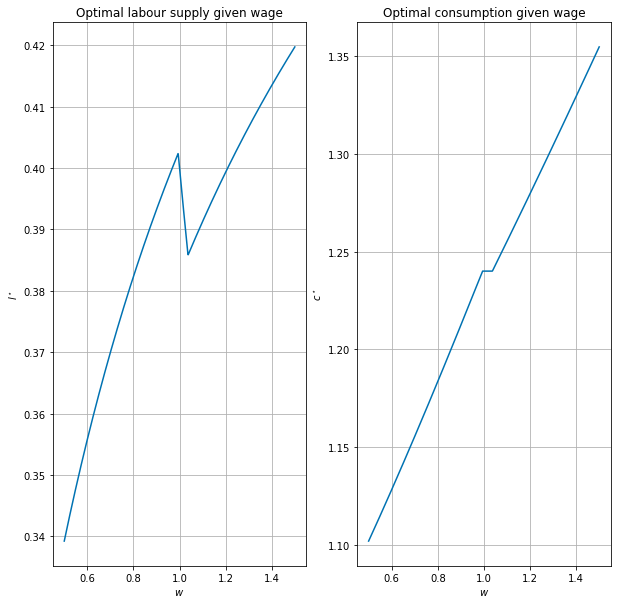

In [27]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")

N=1000
w_vec=np.linspace(0.5,1.5,N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(w_vec):
    bundle=optimiser(w,e,v,tau_0,tau_1,kappa,m)
    l_vec[i]=bundle[0]
    c_vec[i]=bundle[1]

# a. create a figure
fig = plt.figure(figsize=(10,10))

# c. left plot
ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vec,l_vec)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vec,c_vec)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show

# Question 3

ADD ANSWER.

In [26]:
N=10000
wi_vec=np.linspace(0.5,1.5,N)
l_vec=np.empty(N)
c_vec=np.empty(N)
for i,w in enumerate(wi_vec):
    bundle=optimiser(w,e,v,tau_0,tau_1,kappa,m)
    l_vec[i]=bundle[0]

import pandas as pd
tax_list=pd.DataFrame({'lstar':l_vec,'wages':wi_vec})
print(tax_list)

def tax_rev(tau_0,w,tau_1,kappa,l):
    return tau0*w*l+tau_1*max(w*l-kappa)


lstar   wages
0     0.339241  0.5000
1     0.339259  0.5001
2     0.339277  0.5002
3     0.339295  0.5003
4     0.339313  0.5004
...        ...     ...
9995  0.419694  1.4996
9996  0.419700  1.4997
9997  0.419706  1.4998
9998  0.419712  1.4999
9999  0.419718  1.5000

[10000 rows x 2 columns]


# Question 4

ADD ANSWER.

In [5]:
# code

# Question 5

ADD ANSWER.

In [6]:
# code

# Conclusion

ADD CONCISE CONLUSION.